# Ride Share Price Predictor (Boston Area 2018)
Using a linear regression ml model to make a predictor of ride sharing ride fare based on ride distance, time of day, ride type, and ride provider. 
We will be training it with uber-lyft-car-prices dataset which was provided by RaviMunde on Kaggle.


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def getDayOfWeek(row): # takes in a unix time and outputs the day of the week as a number between 0 and 6
    ts = datetime.datetime.fromtimestamp((row/1000))
    return(int(ts.strftime('%w')))

In [3]:
def getHour(row): # takes in a unix time value and outputs the hour
    ts = datetime.datetime.fromtimestamp((row/1000))
    return(int(ts.strftime('%H')))

In [4]:
importedData = pd.read_csv('../input/uber-lyft-cab-prices/cab_rides.csv')
df = pd.DataFrame(importedData,columns=['distance','cab_type','time_stamp','price','surge_multiplier','name'])

leName = preprocessing.LabelEncoder() 
leName.fit(pd.unique(df['name'])) 

leCab = preprocessing.LabelEncoder()
leCab.fit(pd.unique(df['cab_type'])) 

df['cab_type'] = leCab.transform(df['cab_type']) # changing the ride share app to an integer either 0 or 1
df['name'] = leName.transform(df['name']) # changing the ride type to an integer 0-12

df['Day_Of_Week'] = df['time_stamp'].apply(getDayOfWeek) # storing the day of the week as a number between 0 and 6
df['Hour'] = df['time_stamp'].apply(getHour) # storing the hour the ride was called as a number between 0 and 23
del df['time_stamp'] # deleting the time_stamp column since we extracted the data we needed from it already

In [5]:
df.drop(df.index[df['name'] == 8], inplace = True)

In [6]:
price = df['price']
tempDf = df
del tempDf['price']
arr = np.asarray(tempDf)
trans = PolynomialFeatures(degree=6)
data = trans.fit_transform(arr)

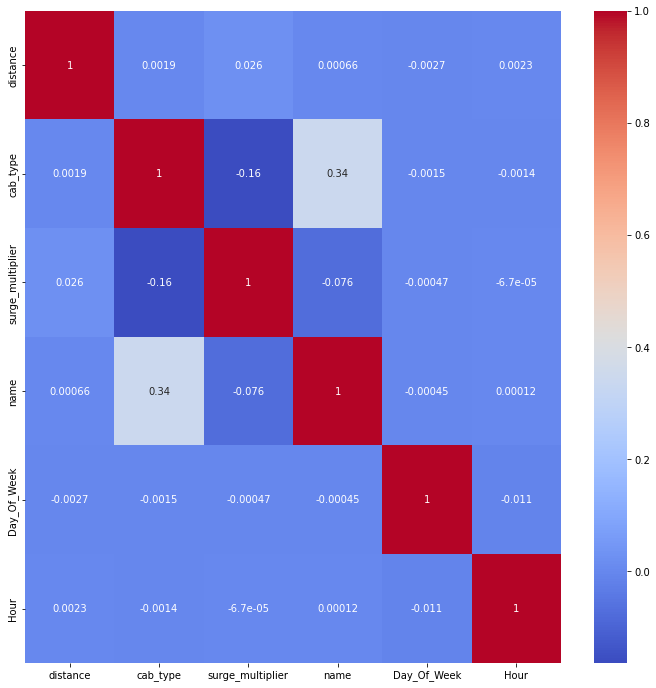

In [7]:
from seaborn import heatmap

corr = df.corr()

plt.figure(figsize = (12,12))
heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [8]:

X = data
y = price
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=42)

#print(x_train)
lr = LinearRegression()

lr.fit(x_train,y_train)

predictY_test = lr.predict(x_test)

print("Coefficients: \n", lr.coef_)

print("Mean squared error: %2f" % mean_squared_error(y_test, predictY_test))

print("Training Score: {:.2f}".format(lr.score(x_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test,y_test)))



Coefficients: 
 [-6.12307695e-07 -3.46964439e+01 -1.48287791e+01  2.52807363e+03
 -7.69437250e+02  2.06146198e+01 -9.04737393e+00  1.34552900e+01
  4.14703653e-01 -3.32492649e+02  2.44775146e+02 -3.56813091e+00
 -1.92207662e+00 -1.48346218e+01 -1.48344590e+01  2.41620181e+02
  1.89780008e-02 -6.34058871e-04 -3.97462464e+03  6.38681521e+02
 -8.96206945e+01  2.14331680e+01  1.73002202e+02  2.36537821e+00
  1.84023192e+00  1.04092182e+01  4.43460976e-01  4.88630447e-01
 -1.33972724e+01  6.69303131e-01  2.33804369e+01 -4.95366520e+00
  1.18687437e+00  2.51520499e-01  4.14531315e-01  4.14556894e-01
 -2.53127266e+00  7.31876458e-03  9.83787203e-03  5.37407790e+02
 -2.07388020e+02  1.20356567e+01  4.29648884e+00 -1.04558133e+02
 -3.50344695e-01 -2.20416286e-02 -2.05618216e+00 -7.72642526e-02
  4.95139011e-03 -1.48347025e+01 -1.48346331e+01  2.41620108e+02
  1.90406304e-02 -4.34881414e-04 -1.48346350e+01  2.41620124e+02
  1.90392784e-02 -4.66268175e-04 -4.62673656e+02 -1.96625020e-02
  3.46675

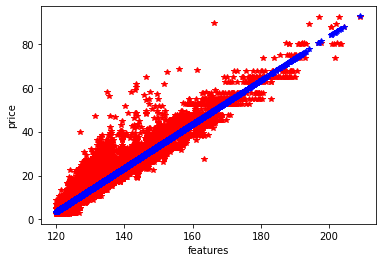

In [9]:
x =[]
x_trn_nump = x_test
for element in x_trn_nump:
    x.append(np.dot(element, lr.coef_))
    
plt.plot(x,y_test,'*r',)
plt.plot(x,lr.predict(x_test),'*b')
plt.ylabel('price')
plt.xlabel('features')
plt.show()
